# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's BipedalWalker-v2 environment.

### 1. Install/Import the Necessary Packages

In [1]:
!pip -q install .
!pip install torch


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [1]:
import time, torch, datetime
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
%matplotlib inline

from ddpg_agent import Agent

start_time = time.time()

### 2. Instantiate Environment and Agent

Run the code cell below to print some information about the environment.

In [2]:
# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
state_size = env_info.vector_observations.shape[1]
agent = Agent(num_agents = num_agents, state_size=state_size, action_size=action_size, random_seed=10)

Found path: /data/Reacher_Linux_NoVis/Reacher.x86_64
Mono path[0] = '/data/Reacher_Linux_NoVis/Reacher_Data/Managed'
Mono config path = '/data/Reacher_Linux_NoVis/Reacher_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

Episode 100	Average Score: 27.50	Score: 36.06	Episode Time: 0:00:50.029046
Episode 107	Average Score: 30.01	Score: 37.02	Episode Time: 0:00:49.998821
Environment solved in 107 episodes (score: 30.009739329230037)


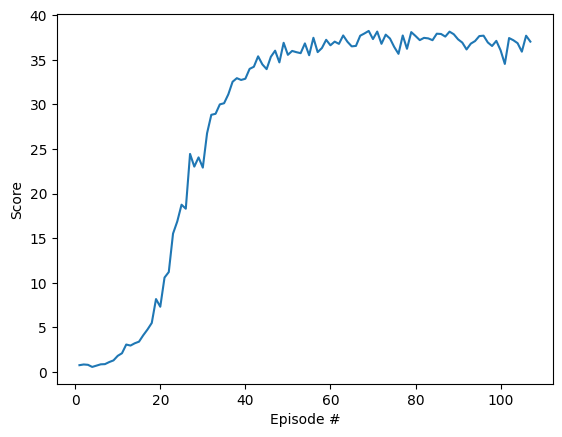

In [3]:
def ddpg(n_episodes=2000, max_t=700):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        eps_start = time.time()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if np.any(done):
                break 
        mean_score = np.mean(score)
        scores_deque.append(mean_score)
        scores.append(mean_score)
        eps_end = time.time()
        eps_execution_time = str(datetime.timedelta(seconds=eps_end-eps_start))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tEpisode Time: {}'.format(i_episode, np.mean(scores_deque), mean_score,eps_execution_time), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if len(scores_deque) == 100 and np.mean(scores_deque) >=30:
            torch.save(agent.actor_local.state_dict(), 'solution_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'solution_critic.pth')
            print('\nEnvironment solved in {} episodes (score: {})'.format(i_episode, np.mean(scores_deque)))
            break
    return scores

scores = ddpg(n_episodes=500,max_t=1000)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('training_performance.png')
plt.show()

### 4. Test the Agent

Test the agent by running the code cells below! Objective of the testing is to ensure the agent can achieve an average score of 30 over 100 consecutive episodes. The plot produced will show the training scores for each episode and a line representing the average over the 100 episodes.

/tmp/ipykernel_414/1783385630.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  agent.actor_local.load_state_dict(torch.load('solution_actor.pth'))
/tmp/ipykernel_414/1783

Episode 100	Score: 39.59
Average score 39.50	Episodes: 100.00


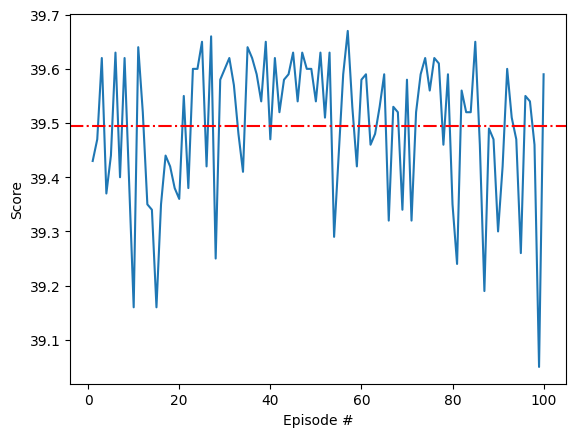

Training took  3:42:45.250677


In [4]:
def test(episodes=100):
    #Load agent solution
    agent.actor_local.load_state_dict(torch.load('solution_actor.pth'))
    agent.critic_local.load_state_dict(torch.load('solution_critic.pth'))
    scores = []
    for i_episode in range(1,episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            score += reward
            state = next_state
            if any(done):
                break
        max_score = np.max(score)
        scores.append(max_score)
        print('\rEpisode {}\tScore: {:.2f}'.format(i_episode, max_score), end="")
    running_average = np.mean(scores)
    print("\nAverage score {:.2f}\tEpisodes: {:.2f}".format(running_average, i_episode))
    return scores

scores = test()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.axhline(np.mean(scores), color='r', linestyle='-.', label='Mean Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('trained_agent_performance.png')
plt.show()

execution_time = time.time() - start_time
print("Training took ",str(datetime.timedelta(seconds=execution_time)))

When finished, you can close the environment.

In [5]:
env.close()